In [23]:
import iris
import glob
import os, sys
import matplotlib.pyplot as plt
import numpy
import iris.plot as iplt

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio
import timeseries
import convenient_universal as uconv

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
sfdsi_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/sfdsi/gn/v20190710/sfdsi_Omon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_*.nc')
soga_files = glob.glob('/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/soga/gn/v20190710/soga_Omon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_*.nc')
areacello_file = '/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Ofx/areacello/gn/v20190710/areacello_Ofx_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn.nc'

## Sea ice basal salt flux

In [10]:
sfdsi_cube, history = gio.combine_files(sfdsi_files, 'downward_sea_ice_basal_salt_flux')

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'sfdsi'
  warnings.warn(message % (variable_name, nc_var

In [11]:
sfdsi_cube

<iris 'Cube' of downward_sea_ice_basal_salt_flux / (kg m-2 s-1) (time: 12000; cell index along second dimension: 220; cell index along first dimension: 256)>

In [13]:
sfdsi_cube = timeseries.convert_to_annual(sfdsi_cube)

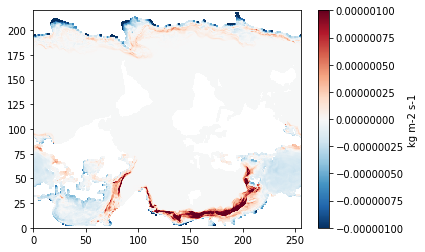

In [17]:
vmin = -1e-6
vmax = 1e-6
#iplt.pcolormesh(plot_cube, cmap='RdBu_r', vmin=vmin, vmax=vmax)
plt.pcolormesh(sfdsi_cube.data[0, ::], cmap='RdBu_r', vmin=vmin, vmax=vmax)
cb = plt.colorbar()
cb.set_label(str(sfdsi_cube.units))
plt.show()

In [21]:
# convert units from kg m-2 s-1 to kg

area_cube = iris.load_cube(areacello_file)
area_array = uconv.broadcast_array(area_cube.data, [1, area_cube.ndim], sfdsi_cube.shape)
units = str(sfdsi_cube.units)
sfdsi_cube.units = units.replace('m-2', '')
sfdsi_cube.data = sfdsi_cube.data * area_array

global_sum = numpy.ma.sum(sfdsi_cube.data, axis=(1,2))
sfdsi_cube = sfdsi_cube[:, 0, 0].copy()
sfdsi_cube.data = global_sum

sfdsi_cube = timeseries.flux_to_total(sfdsi_cube)

In [22]:
sfdsi_cube

Downward Sea Ice Basal Salt Flux (kg),time
Shape,1000
Dimension coordinates,
time,x
Scalar coordinates,
cell index along first dimension,0
cell index along second dimension,0
latitude,"76.35550435427294 degrees, bound=(76.38205329957678, 76.48892526951997, 76.43582054872313, 76.33065612607244) degrees"
longitude,"312.7452884159426 degrees, bound=(313.5286598873243, 313.3146939662899, 312.8537518199624, 313.0816376665253) degrees"
Attributes,
Conventions,CF-1.7 CMIP-6.2


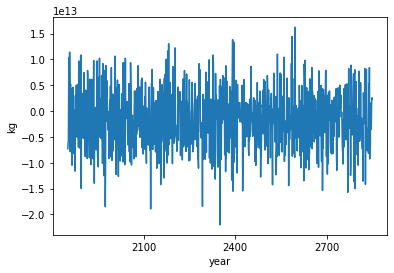

In [31]:
iplt.plot(sfdsi_cube)
plt.ylabel('kg')
plt.xlabel('year')
plt.show()

In [26]:
sfdsi_cumsum_data = numpy.cumsum(sfdsi_cube.data)
sfdsi_cumsum_anomaly = sfdsi_cumsum_data - sfdsi_cumsum_data[0]

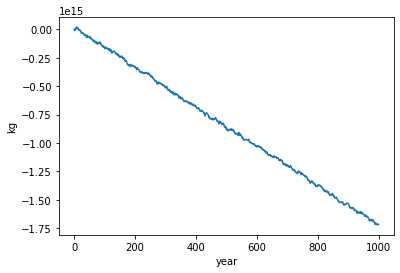

In [30]:
plt.plot(sfdsi_cumsum_anomaly)
plt.ylabel('kg')
plt.xlabel('year')
plt.show()

## Mass of salt in the ocean

In [42]:
soga_cube, history = gio.combine_files(soga_files, 'sea_water_salinity')
soga_cube = timeseries.convert_to_annual(soga_cube)

In [43]:
soga_cube

Sea Water Salinity (0.001),time
Shape,1000
Dimension coordinates,
time,x
Attributes,
Conventions,CF-1.7 CMIP-6.2
activity_id,CMIP
branch_method,standard
branch_time_in_child,0.0
branch_time_in_parent,18262.0
cmor_version,3.5.0


In [44]:
mass_of_ocean = 1.4e21 #kg
mass_of_salt = soga_cube.data * 1000 * mass_of_ocean

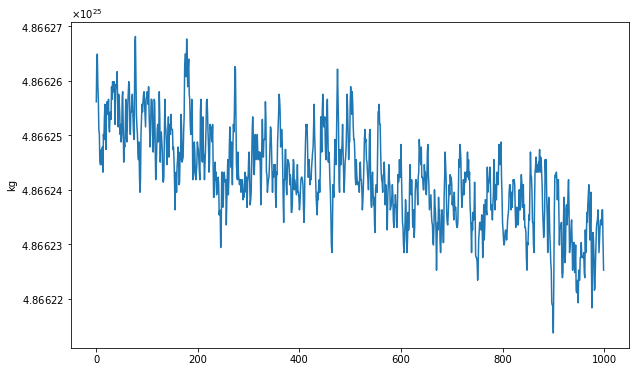

In [45]:
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(111)
plt.plot(mass_of_salt)
plt.ylabel('kg')
ax.ticklabel_format(useOffset=False)
ax.yaxis.major.formatter._useMathText = True

In [46]:
print(mass_of_salt.min())
print(mass_of_salt.max())

4.8662137e+25
4.866268e+25


In [47]:
mass_of_salt_anomaly = mass_of_salt - mass_of_salt[0]

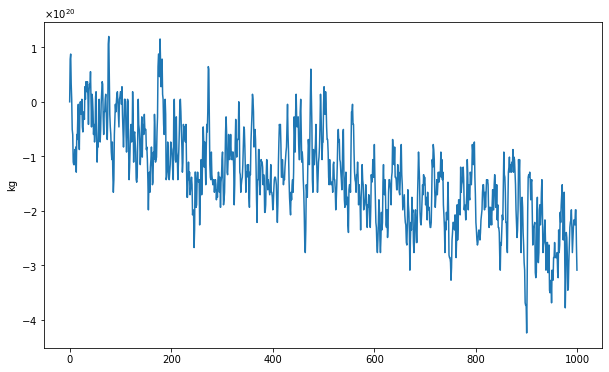

In [48]:
fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(111)
plt.plot(mass_of_salt_anomaly)
plt.ylabel('kg')
ax.ticklabel_format(useOffset=False)
ax.yaxis.major.formatter._useMathText = True

## Comparison

In [54]:
time_axis = numpy.arange(0, len(mass_of_salt_anomaly)) 
mass_of_salt_trend = timeseries.linear_trend(mass_of_salt_anomaly, time_axis, None)
print(f"{mass_of_salt_trend} kg/yr")

-2.139503939875967e+17 kg/yr


In [55]:
sfdsi_trend = timeseries.linear_trend(sfdsi_cumsum_anomaly, time_axis, None)
print(f"{sfdsi_trend} kg/yr")

-1737988137098.3135 kg/yr


In [56]:
(sfdsi_trend / mass_of_salt_trend) * 100

0.0008123322910071713

The cumulative sea ice basal salt flux explains 0.0008% of the drift in ocean salt content. 